## Import Libraries and Files

In [1]:
# Import Libraries 
import pandas as pd
import numpy as np
import os
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [28]:
# Import File
bike = pd.read_pickle(r'../Data/Prepared/bike_flag.pkl')

## Data Preparation

In [29]:
# Create Month col. 
bike['date'] = pd.to_datetime(bike['date'], format = '%Y-%m-%d')

In [30]:
bike['month'] = bike['date'].dt.month

In [31]:
bike['month'] = bike['month'].astype('int')

In [32]:
# Create season col. 
bike['season'] = [
    'Winter' if (month==12 or month <=2)
    else 'Spring' if (3 <= month <=5)
    else 'Summer' if (6 <= month <=8)
    else 'Fall'
for month in bike['month']
]

## Visualisations with Plotly

#### bar chart

In [33]:
# Look for most popular stations
bike['value'] = 1
bike_grouped = bike.groupby('start_station', as_index = False).agg({'value' : 'sum'})

In [34]:
# Define top 20 start stations
top20 = bike_grouped.nlargest(20, 'value')

In [ ]:
# Plot top 20 start stations
fig = go.Figure(go.Bar(x = top20['start_station'], 
                       y = top20['value'], 
                       marker = {'color' : top20['value'], 'colorscale' : 'oranges'} ))
fig.update_layout(
    title = '20 Most Popular Bike Stations in NY', 
                  xaxis_title = 'Start Stations', 
                  yaxis_title = 'Trips', 
                  width = 900, 
                  height = 600
)

#### line chart

In [35]:
# Sort the data by date
bike = bike.sort_values(by='date')

In [ ]:
# Create subplot with secondary y-axis
fig = make_subplots(specs=[[{'secondary_y': True}]])

# Add first trace for Daily Bike Rides (primary y-axis)
fig.add_trace(
    go.Scatter(
        x=bike['date'], 
        y=bike['trips_per_day'], 
        name='Daily Bike Rides', 
        marker={'color': '#343D71'},
        line=dict(color='#343D71')
    ), secondary_y=False  #Specify secondary_y  
)

# Add second trace for Daily Temperature (secondary y-axis)
fig.add_trace(
    go.Scatter(
        x=bike['date'], 
        y=bike['avg_temp'], 
        name='Daily Temperature', 
        marker={'color': '#D93240'},
        line=dict(color='#D93240')
    ), secondary_y=True  # Specify secondary_y here
)

# Update layout
fig.update_layout(
    title='Daily Bike Trips and Temperature in NY (2023)', 
    height=800,
    plot_bgcolor='white',  # Set the plot background (inside the axes) to white
    paper_bgcolor='white',  # Set the entire figure background to white
)

#### Pie

In [36]:
# Group data to plot
usage = bike.groupby('trip_leng')['ride_id'].nunique().reset_index()

In [39]:
# Define custom colours
custom_cols = ['#F2808A', '#43AED9']

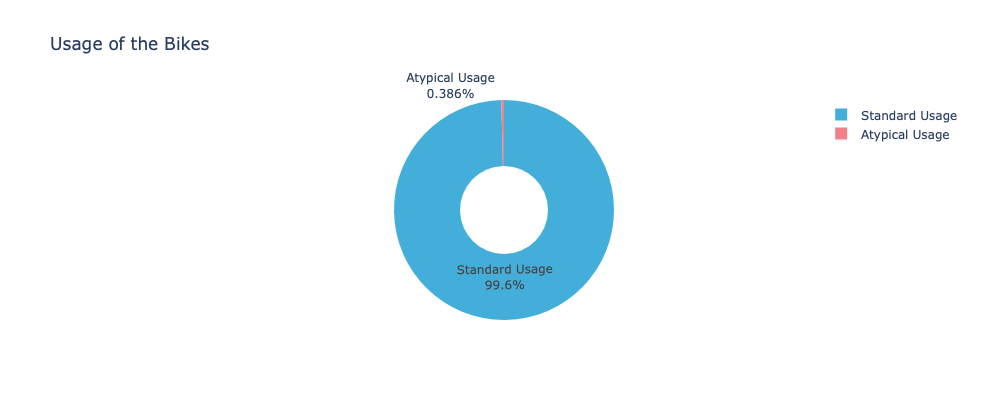

In [40]:
# Plot usage
fig = go.Figure(go.Pie(values=usage['ride_id'],
                       labels=usage['trip_leng'],
                       hole=0.4,
                       marker=dict(colors=custom_cols)))
# Update Layout
fig.update_traces(textinfo='percent+label')
fig.update_layout(title='Usage of the Bikes',
                  height=400,
                  width=400)

## Save Files

In [37]:
# Save top 20 start stations
top20.to_csv(r'../Data/Prepared/top20.csv')

In [38]:
# Select data for dashboard
dash=bike[['date', 'start_station', 'trips_per_day', 'avg_temp', 'season', 'membership', 'trip_leng', 'ride_id', 'value', 'bike_type', 'trip_mins']]

# Sample data
np.random.seed(32)
red=np.random.rand(len(dash)) <= 0.92
small=dash[~red]

# Check sample
small.shape

(79019, 11)

In [39]:
# Save dashboard data
small.to_csv(r'../Data/Prepared/dashdata.csv')